### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
cleansed_data = data.fillna(0)

In [6]:
cleansed_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [7]:
coupon_accepts_df = cleansed_data[cleansed_data['Y'] == 1]

In [8]:
coupon_accepts_df.shape[0]

7210

In [9]:
cleansed_data.shape[0]

12684

In [10]:
percent_accept = coupon_accepts_df.shape[0]/cleansed_data.shape[0]

In [11]:
print(percent_accept)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

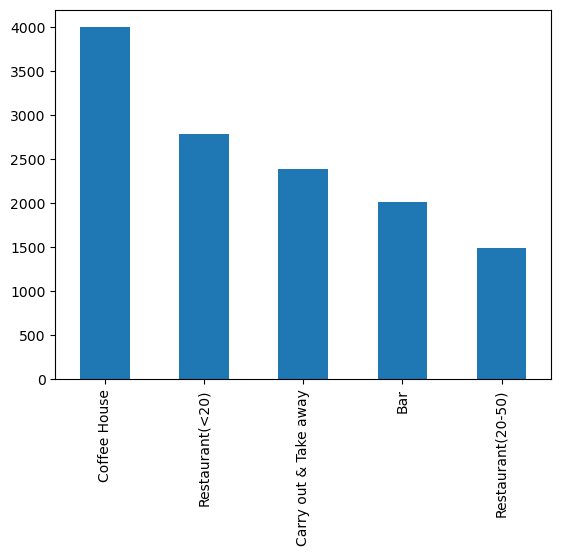

In [12]:
cleansed_data['coupon'].value_counts(sort='False').plot.bar()

6. Use a histogram to visualize the temperature column.

array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

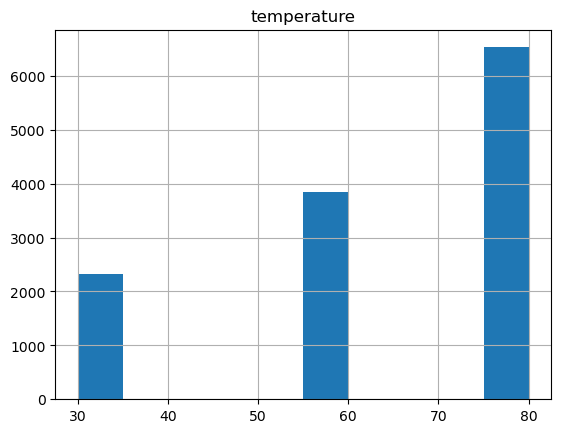

In [13]:
cleansed_data.hist(column='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_coupons_df = cleansed_data[cleansed_data['coupon'] == 'Bar']

In [15]:
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [16]:
bar_coupon_accepts_df = bar_coupons_df[bar_coupons_df['Y'] == 1]

In [17]:
bar_coupon_accepts_df.shape[0]

827

In [18]:
bar_coupons_df.shape[0]

2017

In [19]:
bar_coupons_acceptance_rate = bar_coupon_accepts_df.shape[0]/bar_coupons_df.shape[0]

In [20]:
print(bar_coupons_acceptance_rate)

0.41001487357461575


41 percent of bar coupons were accepted overall.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Only selecting certain columns for easier manipulation and reading of data

In [21]:
list(bar_coupons_df.columns)

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

In [22]:
bar_coupons_important_columns = bar_coupons_df[['age', 'passanger', 'income','maritalStatus', 'RestaurantLessThan20','gender','occupation','coupon', 'Bar','Y']].copy()

In [23]:
bar_coupons_important_columns.head()

,age,passanger,income,maritalStatus,RestaurantLessThan20,gender,occupation,coupon,Bar,Y
9,21,Kid(s),$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,0
13,21,Alone,$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,1
17,21,Alone,$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,0
24,21,Friend(s),$62500 - $74999,Single,4~8,Male,Architecture & Engineering,Bar,never,1
35,21,Alone,$62500 - $74999,Single,4~8,Male,Architecture & Engineering,Bar,never,1


<AxesSubplot:>

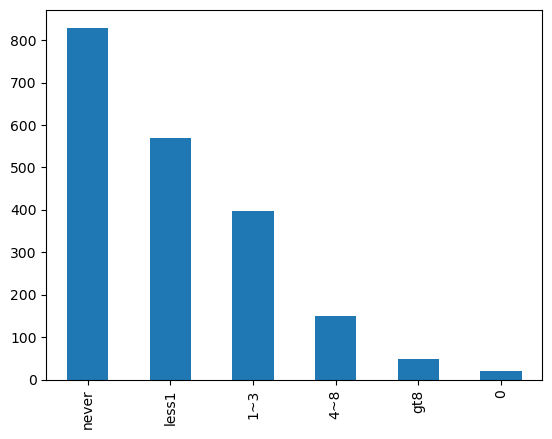

In [24]:
bar_coupons_important_columns['Bar'].value_counts(sort='False').plot.bar()

Calculating acceptance rate for three or fewer times

In [27]:
three_or_fewer_times = bar_coupons_important_columns[((bar_coupons_important_columns['Bar'] == '1~3') | (bar_coupons_important_columns['Bar'] == 'less1'))]

In [28]:
three_or_fewer_times_accepts = three_or_fewer_times[three_or_fewer_times['Y'] == 1]

In [29]:
bar_three_or_fewer_acceptance_rate = three_or_fewer_times_accepts.shape[0]/three_or_fewer_times.shape[0]

In [30]:
print(bar_three_or_fewer_acceptance_rate)

0.5274043433298863


Calculating acceptance rate for those that went to the bar more than 3 times

In [31]:
more_than_three_times = bar_coupons_important_columns[((bar_coupons_important_columns['Bar'] == '4~8') | (bar_coupons_important_columns['Bar'] == 'gt8'))]

In [32]:
more_than_three_times_accepts = more_than_three_times[more_than_three_times['Y'] == 1]

In [33]:
bar_more_than_three_times_acceptance_rate = more_than_three_times_accepts.shape[0]/more_than_three_times.shape[0]

In [34]:
print(bar_more_than_three_times_acceptance_rate)

0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
more_than_once_a_month = bar_coupons_important_columns[((bar_coupons_important_columns['Bar'] == '1~3') | (bar_coupons_important_columns['Bar'] == '4~8') | (bar_coupons_important_columns['Bar'] == 'gt8'))]

<AxesSubplot:>

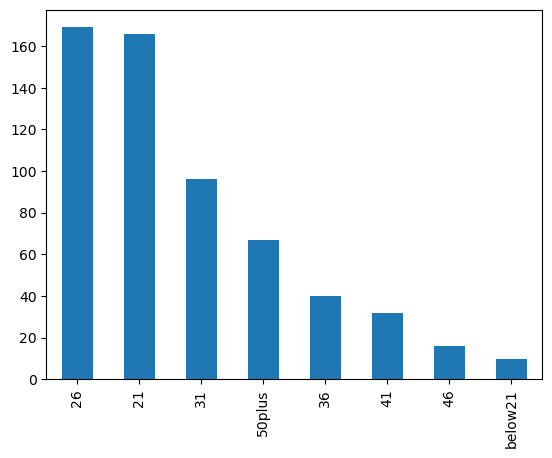

In [36]:
more_than_once_a_month['age'].value_counts(sort='False').plot.bar()

In [37]:
more_than_once_a_month_and_age_gt_25 = more_than_once_a_month[(more_than_once_a_month['age'] != '21') & (more_than_once_a_month['age'] != 'below21')]

<AxesSubplot:>

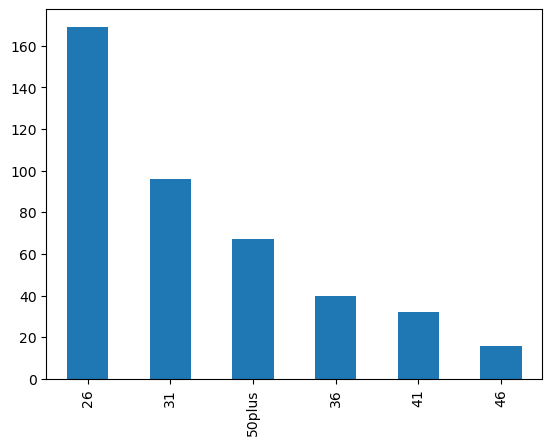

In [38]:
more_than_once_a_month_and_age_gt_25['age'].value_counts(sort='False').plot.bar()

In [39]:
more_than_once_a_month_and_age_gt_25_accepts = more_than_once_a_month_and_age_gt_25[more_than_once_a_month_and_age_gt_25['Y'] == 1]

In [40]:
more_than_once_a_month_and_age_gt_25_acceptance_rate = more_than_once_a_month_and_age_gt_25_accepts.shape[0]/more_than_once_a_month_and_age_gt_25.shape[0]

In [41]:
print(more_than_once_a_month_and_age_gt_25_acceptance_rate)

0.6952380952380952


Yes there is a difference between the acceptance rate of individuals that go to bar more than once a month and are over the age of 25 to the other acceptance rates.  When comparing to the acceptance rate without age as a factor it is lower... which suggests that the younger age group would have a higher acceptance rate.  That said, when comparing the acceptance rate to those that go to the bar three or fewer times it is much higher...suggesting that the frequency of bar visits has a materia impact on the acceptance rate.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<AxesSubplot:>

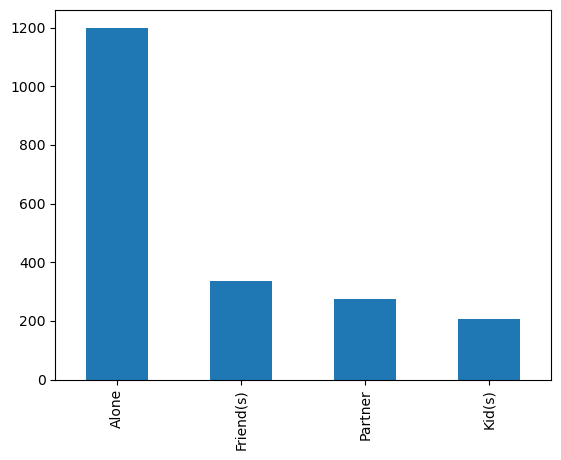

In [42]:
bar_coupons_important_columns['passanger'].value_counts(sort='False').plot.bar()

<AxesSubplot:>

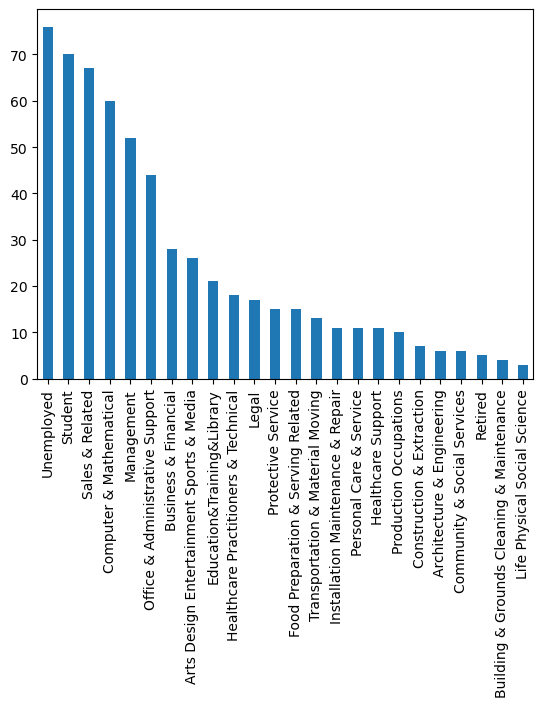

In [95]:
bar_coupons_select_cols_once_a_month_or_more['occupation'].value_counts(sort='False').plot.bar()

In [43]:
question_5_filter = more_than_once_a_month[(more_than_once_a_month['passanger'] != 'Kid(s)') & (more_than_once_a_month['passanger'] != 'Alone') & (more_than_once_a_month['occupation'] != 'Farming Fishing & Forestry')]

In [44]:
question_5_filter.head()

,age,passanger,income,maritalStatus,RestaurantLessThan20,gender,occupation,coupon,Bar,Y
90,21,Friend(s),$12500 - $24999,Single,less1,Male,Student,Bar,1~3,1
112,26,Friend(s),$50000 - $62499,Unmarried partner,1~3,Male,Student,Bar,1~3,1
156,26,Friend(s),$37500 - $49999,Single,gt8,Male,Healthcare Support,Bar,gt8,1
224,21,Partner,$87500 - $99999,Unmarried partner,1~3,Female,Management,Bar,1~3,0
227,21,Partner,$87500 - $99999,Unmarried partner,1~3,Female,Management,Bar,1~3,1


<AxesSubplot:>

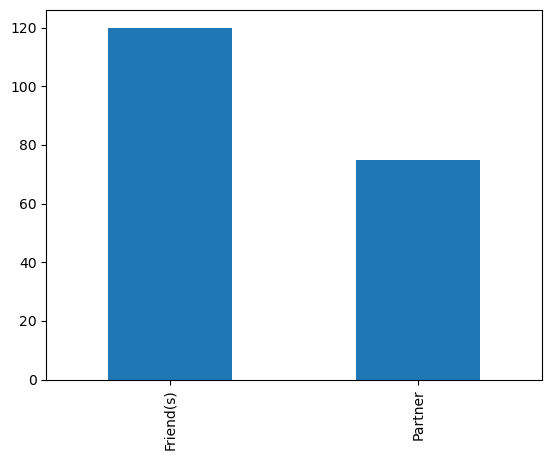

In [45]:
question_5_filter['passanger'].value_counts(sort='False').plot.bar()

In [46]:
question_5_filter_accepts = question_5_filter[question_5_filter['Y'] == 1]

In [47]:
question_5_acceptance_rate = question_5_filter_accepts.shape[0]/question_5_filter.shape[0]

In [48]:
print(question_5_acceptance_rate)

0.717948717948718


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<AxesSubplot:>

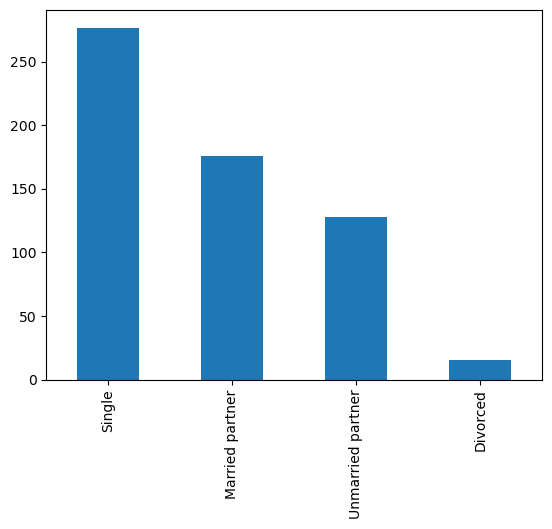

In [49]:
more_than_once_a_month['maritalStatus'].value_counts(sort='False').plot.bar()

<AxesSubplot:>

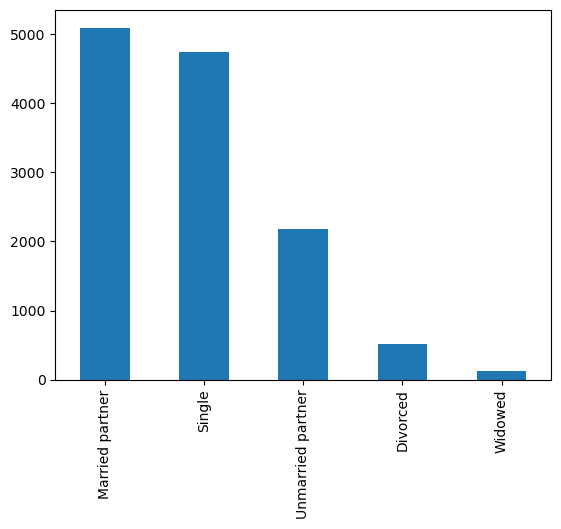

In [50]:
cleansed_data['maritalStatus'].value_counts(sort='False').plot.bar()

Widowed did not show up in users who visited a bar once a month or more so I am checking the data to make sure I am not making any mistakes.

In [52]:
widowed_data = cleansed_data.loc[cleansed_data['maritalStatus'] == 'Widowed']

Bar chart below proves that there are no occurences where someone is Widowed and visited a bar once a month or more.

<AxesSubplot:>

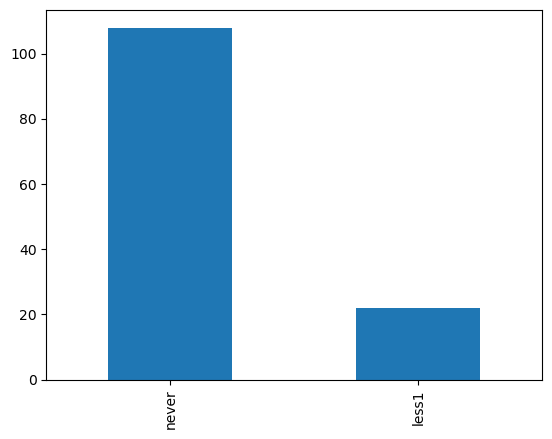

In [53]:
widowed_data['Bar'].value_counts(sort='False').plot.bar()

In [54]:
question_6_filtered = more_than_once_a_month[(more_than_once_a_month['passanger'] != 'Kid(s)') & (more_than_once_a_month['maritalStatus'] != 'Widowed')]

In [55]:
question_6_filtered_accepts = question_6_filtered[question_6_filtered['Y'] == 1]

In [56]:
question_6_acceptance_rate = question_6_filtered_accepts.shape[0]/question_6_filtered.shape[0]

In [57]:
print(question_6_acceptance_rate)

0.7132486388384754


# Go to bars more than once a month and are under the age of 30

<AxesSubplot:>

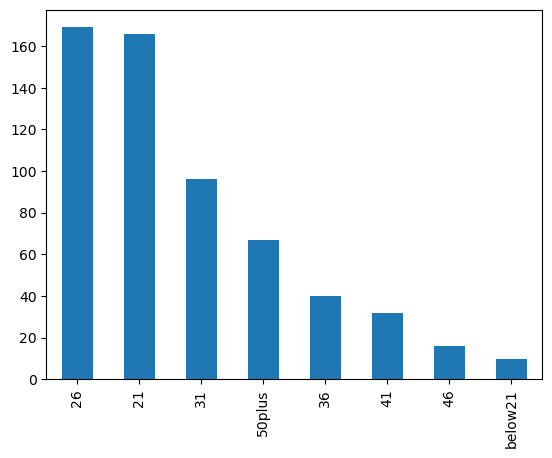

In [58]:
more_than_once_a_month['age'].value_counts(sort='False').plot.bar()

In [59]:
question_6_part_2_filtered = more_than_once_a_month[(more_than_once_a_month['age'] == '26') | (more_than_once_a_month['age'] == '21') | (more_than_once_a_month['age'] == 'below21')]

Check counts of recently created dataframe to confirm accuracy

<AxesSubplot:>

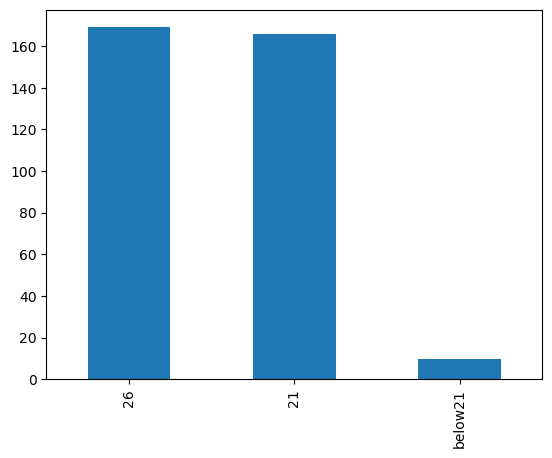

In [60]:
question_6_part_2_filtered['age'].value_counts(sort='False').plot.bar()

Check counts of bar column values

<AxesSubplot:>

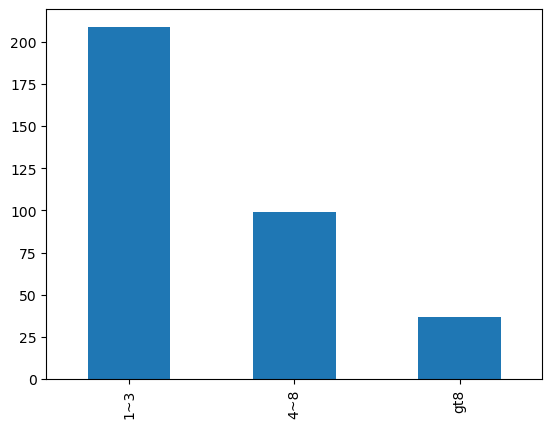

In [61]:
question_6_part_2_filtered['Bar'].value_counts(sort='False').plot.bar()

Note: Criteria requires us to filter based on those who travel to bars more than once a month, however the bar column has values that indicate 1 - 3 months.  Will include those that travel to bars once a month as well... not just the ones who travel more than once a month.

In [63]:
question_6_part_2_filtered_accepts = question_6_part_2_filtered[question_6_part_2_filtered['Y'] == 1]

In [64]:
question_6_part_2_filtered_acceptance_rate = question_6_part_2_filtered_accepts.shape[0]/question_6_part_2_filtered.shape[0]

In [65]:
print(question_6_part_2_filtered_acceptance_rate)

0.7217391304347827


# go to cheap restaurants more than 4 times a month and income is less than 50K

<AxesSubplot:>

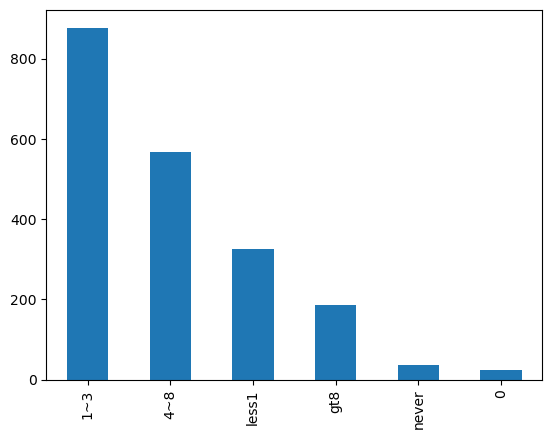

In [66]:
bar_coupons_important_columns['RestaurantLessThan20'].value_counts(sort='False').plot.bar()

<AxesSubplot:>

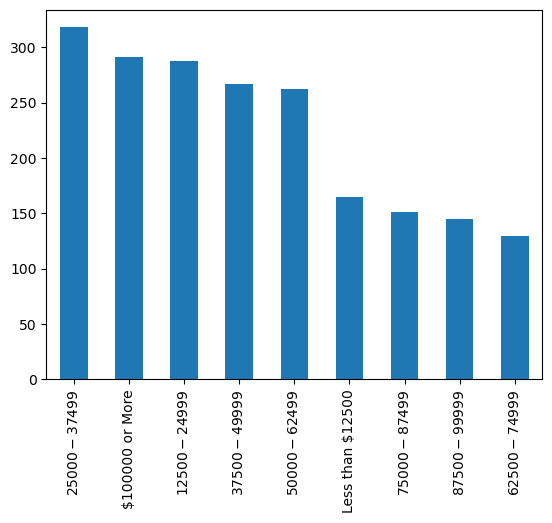

In [67]:
bar_coupons_important_columns['income'].value_counts(sort='False').plot.bar()

In [68]:
coupons_cheap_rest_4_times_a_month = bar_coupons_important_columns[((bar_coupons_important_columns['RestaurantLessThan20'] == '4~8') | (bar_coupons_important_columns['RestaurantLessThan20'] == 'gt8'))]

In [69]:
coupons_cheap_rest_4_times_a_month.tail()

,age,passanger,income,maritalStatus,RestaurantLessThan20,gender,occupation,coupon,Bar,Y
12663,26,Friend(s),$75000 - $87499,Single,4~8,Male,Sales & Related,Bar,never,0
12664,26,Friend(s),$75000 - $87499,Single,4~8,Male,Sales & Related,Bar,never,0
12667,26,Alone,$75000 - $87499,Single,4~8,Male,Sales & Related,Bar,never,0
12670,26,Partner,$75000 - $87499,Single,4~8,Male,Sales & Related,Bar,never,0
12682,26,Alone,$75000 - $87499,Single,4~8,Male,Sales & Related,Bar,never,0


In [70]:
print(coupons_cheap_rest_4_times_a_month['income'])

9        $37500 - $49999
13       $37500 - $49999
17       $37500 - $49999
24       $62500 - $74999
35       $62500 - $74999
              ...       
12663    $75000 - $87499
12664    $75000 - $87499
12667    $75000 - $87499
12670    $75000 - $87499
12682    $75000 - $87499
Name: income, Length: 754, dtype: object


<AxesSubplot:>

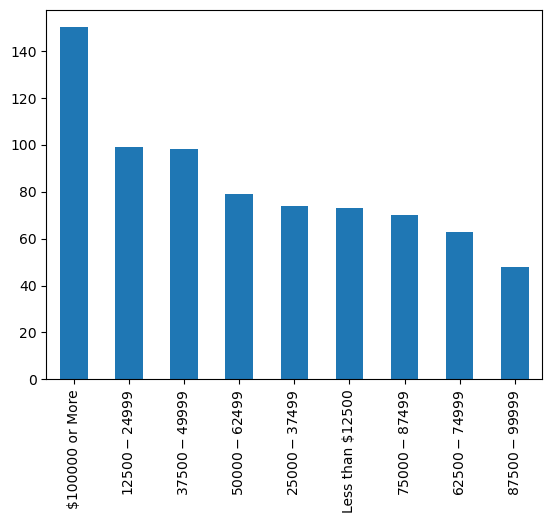

In [71]:
coupons_cheap_rest_4_times_a_month['income'].value_counts(sort='False').plot.bar()

In [72]:
income_filtered = coupons_cheap_rest_4_times_a_month[((coupons_cheap_rest_4_times_a_month['income'] == '$37500 - $49999') | (coupons_cheap_rest_4_times_a_month['income'] == '$12500 - $24999') | (coupons_cheap_rest_4_times_a_month['income'] == '$25000 - $37499'))]

In [73]:
income_filtered.head()

,age,passanger,income,maritalStatus,RestaurantLessThan20,gender,occupation,coupon,Bar,Y
9,21,Kid(s),$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,0
13,21,Alone,$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,1
17,21,Alone,$37500 - $49999,Unmarried partner,4~8,Female,Unemployed,Bar,never,0
156,26,Friend(s),$37500 - $49999,Single,gt8,Male,Healthcare Support,Bar,gt8,1
167,26,Alone,$37500 - $49999,Single,gt8,Male,Healthcare Support,Bar,gt8,1


<AxesSubplot:>

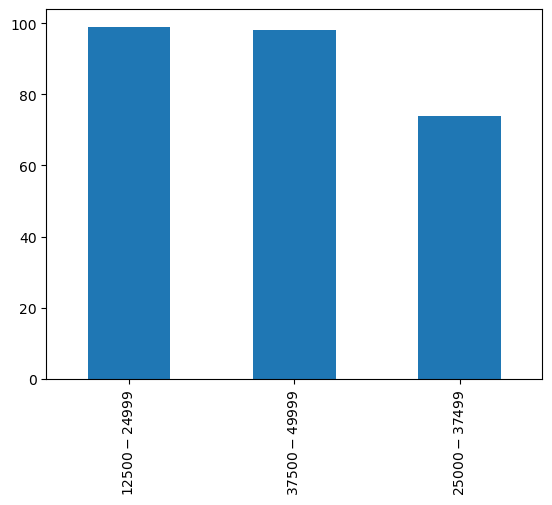

In [74]:
income_filtered['income'].value_counts(sort='False').plot.bar()

In [75]:
income_filtered_accepts = income_filtered[income_filtered['Y'] == 1]

In [76]:
print(income_filtered_accepts.shape[0]/income_filtered.shape[0])

0.4575645756457565


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesize that individuals who go to bars more than once a month are more likely to accept a bar coupon. Other factors don't seem to materially affect acceptance rate other than the number of times an individual goes to a bar during the month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Exploring Coffee House Coupons

In [77]:
coffee_coupons_df = cleansed_data.loc[cleansed_data['coupon'] == 'Coffee House']

In [78]:
coffee_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0


Determine overall acceptance rate of coffee house coupons

In [79]:
coffee_coupons_accepts_df = coffee_coupons_df.loc[coffee_coupons_df['Y'] == 1]

In [80]:
overall_coffee_coupons_acceptance_rate = coffee_coupons_accepts_df.shape[0]/coffee_coupons_df.shape[0]

In [81]:
print(overall_coffee_coupons_acceptance_rate)

0.49924924924924924


Determine if weather is a factor

Determine the valid values for weather column

<AxesSubplot:>

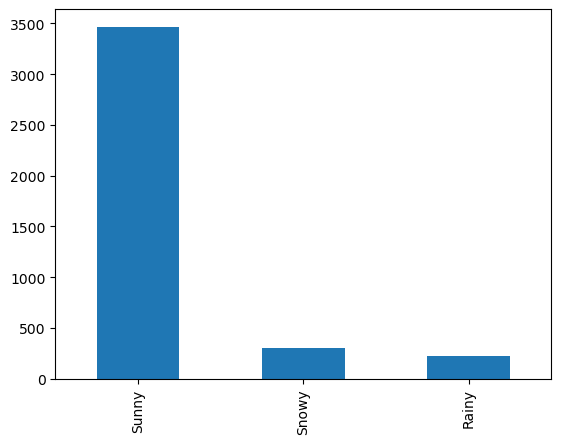

In [83]:
coffee_coupons_df['weather'].value_counts(sort='False').plot.bar()

In [84]:
snowy_weather_df = coffee_coupons_df.loc[coffee_coupons_df['weather'] == 'Snowy']

In [85]:
type(snowy_weather_df)

pandas.core.frame.DataFrame

Calculate acceptance rate for snowy weather

In [86]:
snowy_weather_accepts = snowy_weather_df.loc[snowy_weather_df['Y'] == 1]

In [87]:
snowy_weather_acceptance_rate = snowy_weather_accepts.shape[0]/snowy_weather_df.shape[0]

In [88]:
print(snowy_weather_acceptance_rate)

0.43234323432343236


Snowy weather seems to reduce acceptance rates

Calculate acceptance rate for sunny weather

In [89]:
sunny_weather_df = coffee_coupons_df.loc[coffee_coupons_df['weather'] == 'Sunny']

In [90]:
sunny_weather_accepts = sunny_weather_df.loc[sunny_weather_df['Y'] == 1]

In [91]:
sunny_weather_acceptance_rate = sunny_weather_accepts.shape[0]/sunny_weather_df.shape[0]

In [92]:
print(sunny_weather_acceptance_rate)

0.5036054225555235


Sunny weather seemed to slightly improve acceptance rates but not materially so

Investigate frequency and its relationship to coupon accepts

Determine valid values for frequency

<AxesSubplot:>

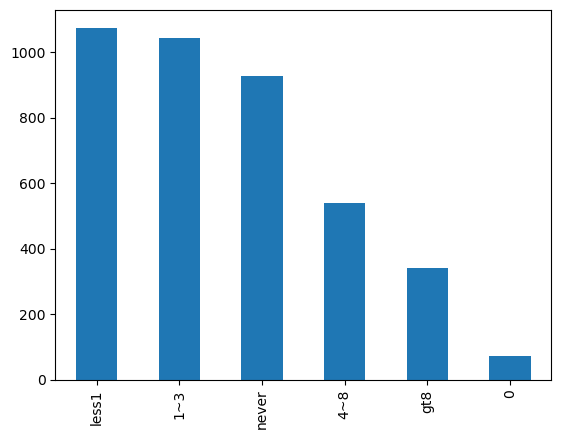

In [93]:
coffee_coupons_df['CoffeeHouse'].value_counts(sort='False').plot.bar()

In [94]:
coffee_more_than_once_a_month = coffee_coupons_df.loc[((coffee_coupons_df['CoffeeHouse'] == '1~3') | (coffee_coupons_df['CoffeeHouse'] == '4~8') | (coffee_coupons_df['CoffeeHouse'] == 'gt8'))]

In [95]:
coffee_more_than_once_a_month_accepts = coffee_more_than_once_a_month.loc[coffee_more_than_once_a_month['Y'] == 1]

In [96]:
coffee_more_than_once_a_month_acceptance_rate = coffee_more_than_once_a_month_accepts.shape[0]/coffee_more_than_once_a_month.shape[0]

In [97]:
print(coffee_more_than_once_a_month_acceptance_rate)

0.6602497398543185


Frequency has an affect.  Combine with age.

<AxesSubplot:>

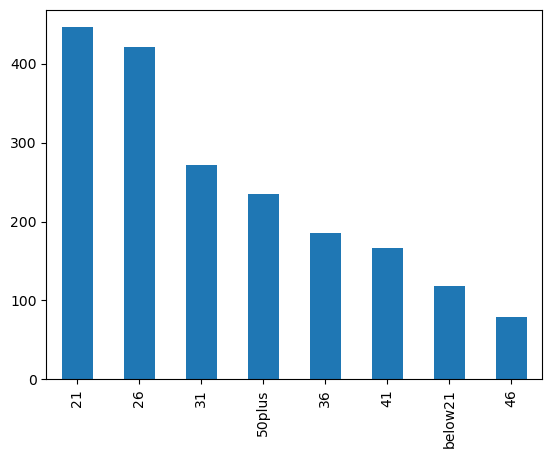

In [98]:
coffee_more_than_once_a_month['age'].value_counts(sort='False').plot.bar()

In [99]:
coffee_more_than_once_a_month_and_young = coffee_more_than_once_a_month.loc[((coffee_more_than_once_a_month['age'] == '21') | (coffee_more_than_once_a_month['age'] == '26') | (coffee_more_than_once_a_month['age'] == 'below21'))]

In [100]:
coffee_more_than_once_a_month_and_young_accepts = coffee_more_than_once_a_month_and_young.loc[coffee_more_than_once_a_month_and_young['Y'] == 1]

In [101]:
coffee_more_than_once_a_month_and_young_acceptance_rate = coffee_more_than_once_a_month_and_young_accepts.shape[0]/coffee_more_than_once_a_month_and_young.shape[0]

In [102]:
print(coffee_more_than_once_a_month_and_young_acceptance_rate)

0.6893401015228426


younger age wasnt a huge factor.  Use count plots to look at other factors

<AxesSubplot:xlabel='age', ylabel='count'>

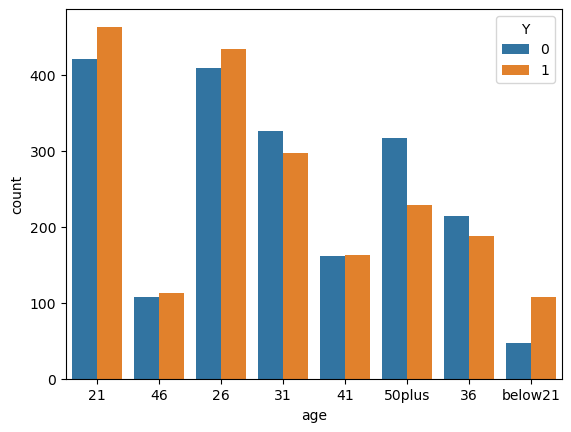

In [103]:
sns.countplot(x='age', hue = 'Y', data=coffee_coupons_df)

Age groups of 21, 26 and below 21 have higher acceptance rates.  This aligns with the acceptance rate calculations from earlier

<AxesSubplot:xlabel='CoffeeHouse', ylabel='count'>

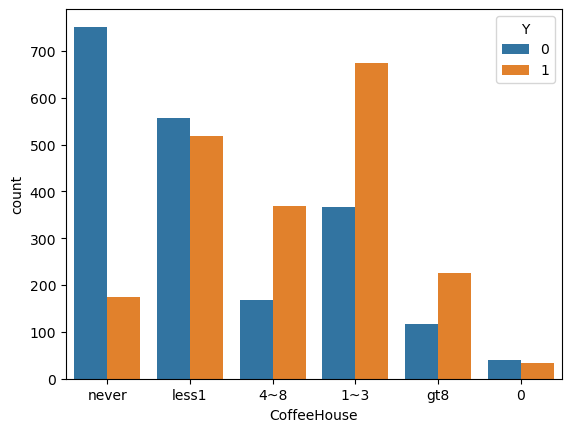

In [104]:
sns.countplot(x='CoffeeHouse', hue = 'Y', data=coffee_coupons_df)

individuals who visited more than once a month have higher acceptance rates.  This aligns with the acceptance calculations from earlier.

<AxesSubplot:xlabel='passanger', ylabel='count'>

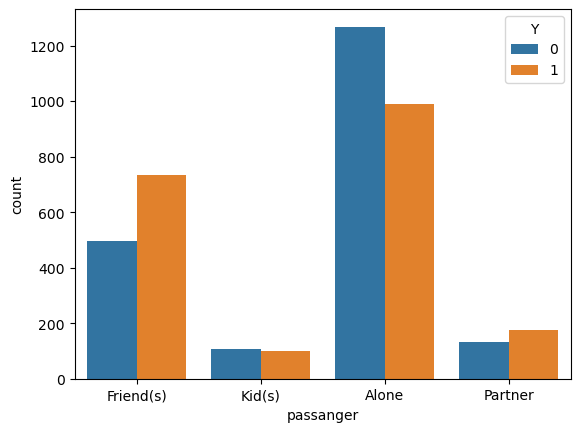

In [104]:
sns.countplot(x='passanger', hue = 'Y', data=coffee_coupons_df)

Individuals with friends have a higher acceptance rate

<AxesSubplot:xlabel='temperature', ylabel='count'>

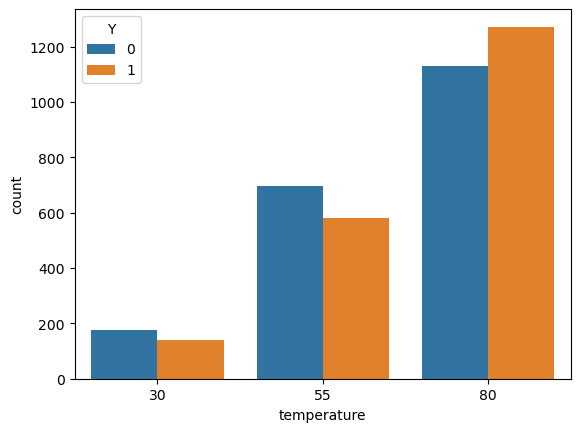

In [105]:
sns.countplot(x='temperature', hue = 'Y', data=coffee_coupons_df)

80 degree temperature is a factor but not by much

<AxesSubplot:xlabel='time', ylabel='count'>

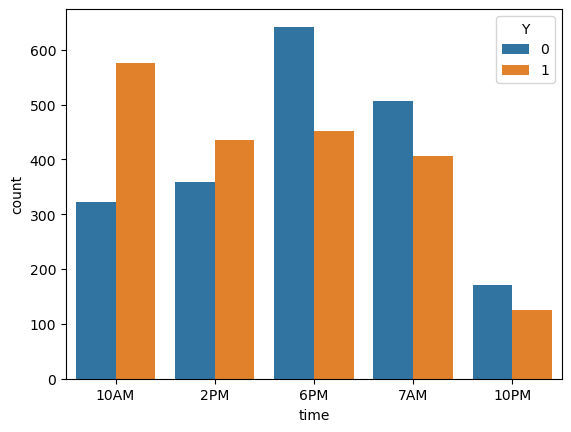

In [106]:
sns.countplot(x='time', hue = 'Y', data=coffee_coupons_df)

Time appears to be a significant factor for acceptance rates

<AxesSubplot:xlabel='gender', ylabel='count'>

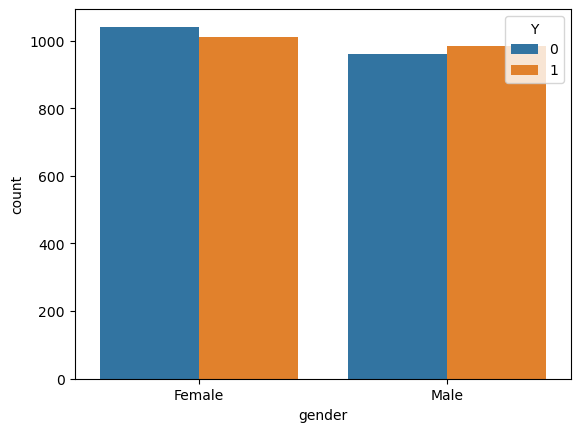

In [107]:
sns.countplot(x='gender', hue = 'Y', data=coffee_coupons_df)

Gender doesn't appear to be a factor at all

[Text(0, 0, 'Unemployed'),
 Text(1, 0, 'Architecture & Engineering'),
 Text(2, 0, 'Student'),
 Text(3, 0, 'Education&Training&Library'),
 Text(4, 0, 'Healthcare Support'),
 Text(5, 0, 'Healthcare Practitioners & Technical'),
 Text(6, 0, 'Sales & Related'),
 Text(7, 0, 'Management'),
 Text(8, 0, 'Arts Design Entertainment Sports & Media'),
 Text(9, 0, 'Computer & Mathematical'),
 Text(10, 0, 'Life Physical Social Science'),
 Text(11, 0, 'Personal Care & Service'),
 Text(12, 0, 'Community & Social Services'),
 Text(13, 0, 'Office & Administrative Support'),
 Text(14, 0, 'Construction & Extraction'),
 Text(15, 0, 'Legal'),
 Text(16, 0, 'Retired'),
 Text(17, 0, 'Installation Maintenance & Repair'),
 Text(18, 0, 'Transportation & Material Moving'),
 Text(19, 0, 'Business & Financial'),
 Text(20, 0, 'Protective Service'),
 Text(21, 0, 'Food Preparation & Serving Related'),
 Text(22, 0, 'Production Occupations'),
 Text(23, 0, 'Building & Grounds Cleaning & Maintenance'),
 Text(24, 0, 'Farming

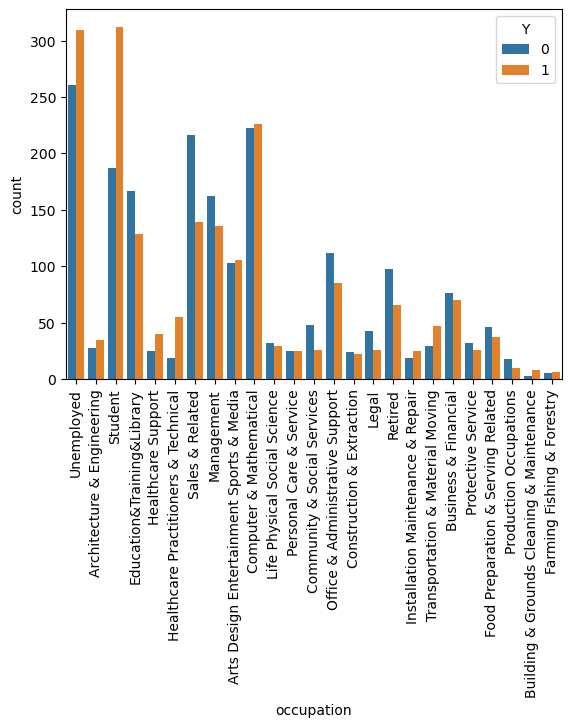

In [108]:
chart = sns.countplot(x='occupation', hue = 'Y', data=coffee_coupons_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Students and unemployed have high acceptance rates

<AxesSubplot:xlabel='expiration', ylabel='count'>

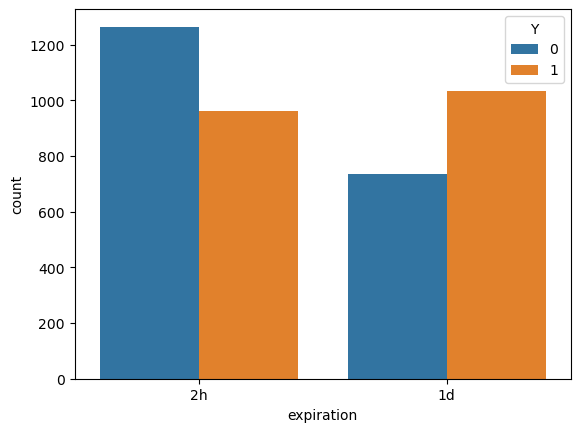

In [109]:
sns.countplot(x='expiration', hue = 'Y', data=coffee_coupons_df)

Acceptance rates are higher for coupons that have 24 hours to expire.  Combine most promising factors to check acceptance rate

In [110]:
coffee_coupons_positive_factors = coffee_coupons_df.loc[((coffee_coupons_df['age'] == '21') | (coffee_coupons_df['age'] == '26') | (coffee_coupons_df['age'] == 'below21'))]

In [111]:
coffee_coupons_positive_factors.shape[0]

1881

In [112]:
coffee_coupons_positive_factors = coffee_coupons_positive_factors.loc[((coffee_coupons_positive_factors['CoffeeHouse'] == '4~8') | (coffee_coupons_positive_factors['CoffeeHouse'] == '1~3') | (coffee_coupons_positive_factors['CoffeeHouse'] == 'gt8'))]

In [113]:
coffee_coupons_positive_factors.shape[0]

985

In [114]:
coffee_coupons_positive_factors = coffee_coupons_positive_factors.loc[((coffee_coupons_positive_factors['time'] == '10AM') | (coffee_coupons_positive_factors['time'] == '2PM'))]

In [115]:
coffee_coupons_positive_factors.shape[0]

422

In [116]:
coffee_coupons_positive_factors = coffee_coupons_positive_factors.loc[((coffee_coupons_positive_factors['occupation'] == 'Unemployed') | (coffee_coupons_positive_factors['occupation'] == 'Student'))]

In [117]:
coffee_coupons_positive_factors.shape[0]

178

In [118]:
coffee_coupons_positive_factors = coffee_coupons_positive_factors.loc[((coffee_coupons_positive_factors['expiration'] == '1d'))]

Calculate acceptance rate

In [119]:
coffee_coupons_positive_factors_accepts = coffee_coupons_positive_factors.loc[coffee_coupons_positive_factors['Y'] == 1]

In [120]:
positive_factors_acceptance_rate = coffee_coupons_positive_factors_accepts.shape[0]/coffee_coupons_positive_factors.shape[0]

In [121]:
print(positive_factors_acceptance_rate)

0.9382716049382716


# Findings (Coffee House Coupon Acceptance Rate)

Based on my analysis I have determined that there are several factors that lead to an increased coffee acceptance.  These factors primarily include 1) attending a coffee shop more than once a month 2) having an occupation of a student or being employed 3) going to the coffee shop during the late morning (10am) or early afternoon (2pm) 4) being under 26 years old and 5) the coupon not expiring for at least 24 hours.  With these factors applied the acceptance rate increases to 93.8 percent from the overall acceptance rate without these factors of about 49.9 percent.  Some factors reduced the acceptance rate.  This was the case with snowy weather.  I also found that using count plots was a very effective means of determining the factors that lead to higher acceptance rates for this data set.

# Next Steps & Recommendations

I believe that an appropriate next step would be to expand this analysis to a larger data set.  As more and more factors are applied the population of individuals becomes much smaller.  As an example when applying the all the factors that drove the acceptance rate to 93.8 percent the number of individuals in the sample size was around 178.  Granted this number is above the sample size of 30 for which one can make reasonable assumptions, I think it would be interesting to see how this acceptance rate changes with increased sample sizes.   I would also recommend conducting this analysis against each of the coupon types. To see if there is a common factor across all coupon types that will materially increase the coupon acceptance rate.